# insurance prediction using LINEAR REGRESSION machine learning algorithm.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import accuracy_score

In [2]:
dataset=pd.read_csv("insurance.csv")

In [3]:
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
dataset.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [5]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

C:\Users\Nellor-3\AppData\Local\Temp\ipykernel_13688\204204353.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["age"])


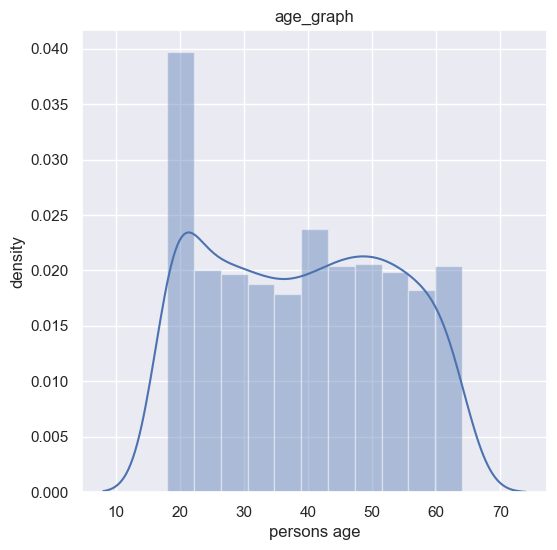

In [6]:
sns.set()
plt.figure(figsize=(6,6))
plt.title("age_graph")
sns.distplot(dataset["age"])
plt.xlabel("persons age")
plt.ylabel("density")

plt.show()

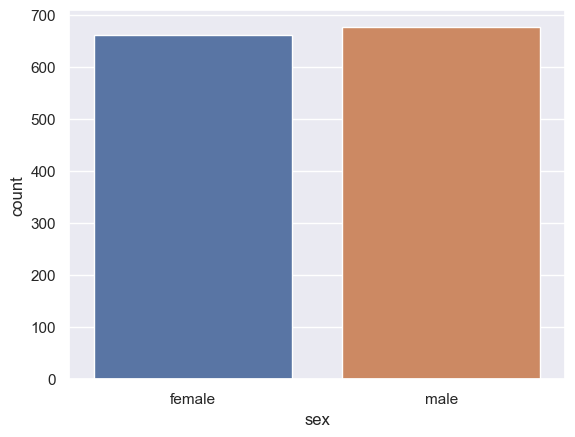

In [7]:
sns.set()
sns.countplot(x="sex",data=dataset)
plt.show()

In [8]:
dataset["sex"].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

C:\Users\Nellor-3\AppData\Local\Temp\ipykernel_13688\717491209.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["bmi"])


<function matplotlib.pyplot.show(close=None, block=None)>

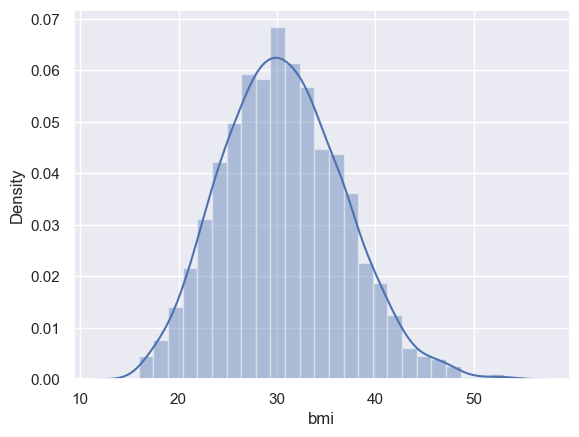

In [9]:
sns.set()
sns.distplot(dataset["bmi"])
plt.show

In [11]:
dataset["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [12]:
dataset.replace({"sex":{ "male":0,"female":1}},inplace=True)

In [13]:
dataset.replace({"smoker":{ "yes":0,"no":1}},inplace=True)

In [15]:
dataset.replace({"region":{ "southeast":0,"southwest":1,"northwest":2,"northeast":3}},inplace=True)

In [16]:
dataset["sex"].value_counts()

sex
0    676
1    662
Name: count, dtype: int64

In [17]:
x=dataset.drop(columns="charges",axis=1)
y=dataset["charges"]

In [18]:
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,2
4,32,0,28.880,0,1,2
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,2
1334,18,1,31.920,0,1,3
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [19]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [21]:
x_train.shape

(1070, 6)

In [22]:
y_train.shape

(1070,)

In [24]:
x_test.shape

(268, 6)

In [25]:
from sklearn.linear_model import LinearRegression


In [26]:
reg=LinearRegression()

In [27]:
reg.fit(x_train,y_train)

LinearRegression()

In [28]:
y_pred=reg.predict(x_test)

In [29]:
metrics.r2_score(y_pred,y_test)

0.6883564262525678